#                                                POLLUTION AND PH OF SOIL- WEATHER SITUATION

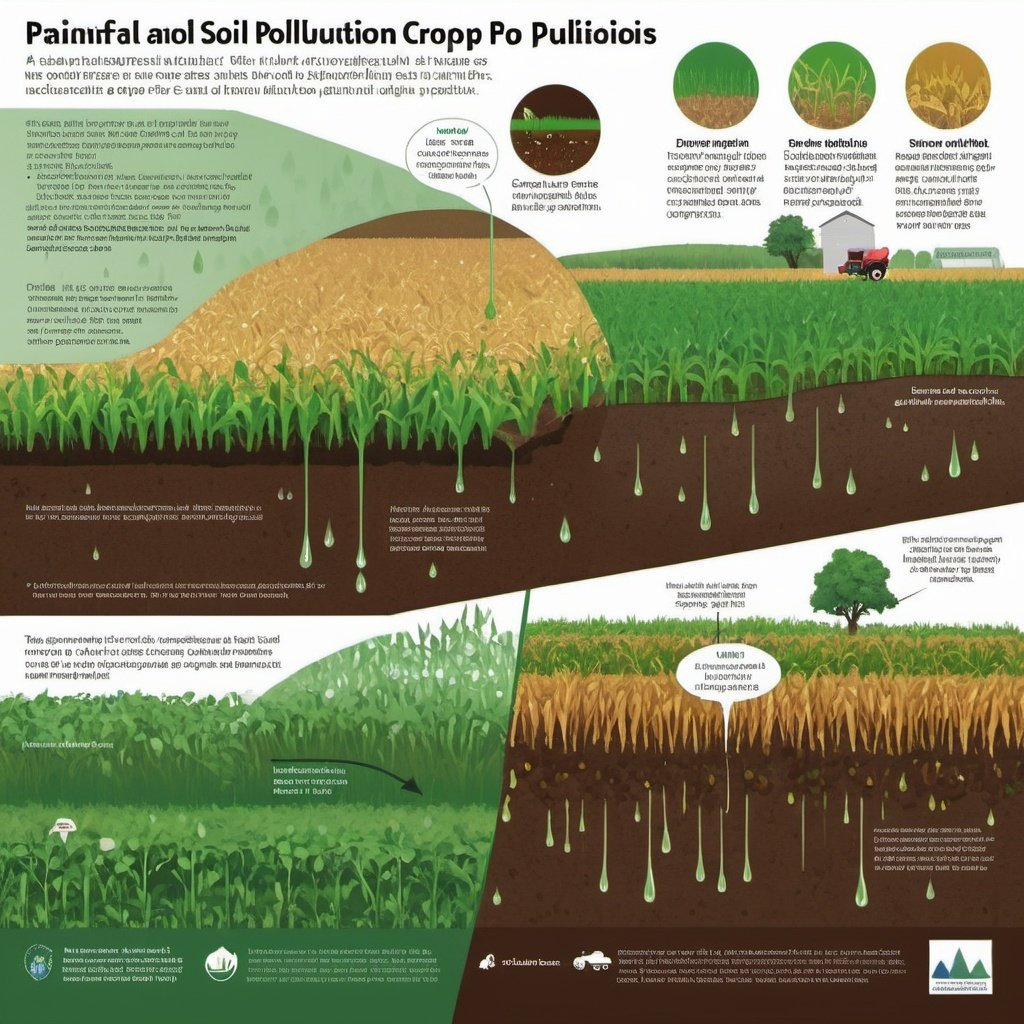

## IMPORT LABRERYS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## LOADING DATA 

In [9]:
# Read the CSV file
data = pd.read_csv('MD_agric_exam-4313.csv')

## EDA 

In [23]:
data.head()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type,Elevation_range
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee,Medium
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato,High
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana,Medium
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat,Medium
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava,High


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Field_ID           1000 non-null   int64  
 1   Elevation          1000 non-null   float64
 2   Rainfall           1000 non-null   float64
 3   Min_temperature_C  1000 non-null   float64
 4   Max_temperature_C  1000 non-null   float64
 5   pH                 1000 non-null   float64
 6   Pollution_level    1000 non-null   float64
 7   Plot_size          1000 non-null   float64
 8   Annual_yield       1000 non-null   float64
 9   Crop_type          1000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 78.3+ KB


In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Field_ID,1000.0,2779.486000,1595.068372,1.000000e+00,1442.250000,2728.500000,4133.000000,5632.000000
Elevation,1000.0,628.136035,179.098546,3.591080e+01,504.392825,657.468975,761.075752,1003.943700
Rainfall,1000.0,1197.734700,497.794699,1.101000e+02,771.575000,1194.900000,1616.900000,2408.500000
Min_temperature_C,1000.0,-4.504100,1.568117,-9.700000e+00,-5.600000,-4.400000,-3.300000,-1.200000
Max_temperature_C,1000.0,30.894600,1.922250,2.510000e+01,29.575000,30.900000,32.200000,37.300000
pH,1000.0,5.603899,0.802154,3.701838e+00,5.018775,5.562078,6.201437,7.484683
Pollution_level,1000.0,0.223374,0.228866,5.400000e-10,0.044494,0.166196,0.307784,0.995413
Plot_size,1000.0,3.962400,3.459036,5.000000e-01,1.500000,2.900000,4.700000,15.000000
Annual_yield,1000.0,2.101536,1.926694,1.748574e-01,0.786612,1.478622,2.519811,12.695224


In [8]:
# Extract unique crop types
unique_crop_types = data['Crop_type'].unique()

# Get the number of unique crop types
num_unique_crop_types = len(unique_crop_types)

print("Number of unique crop types:", num_unique_crop_types)


Number of unique crop types: 8


### Maximum annual yield for wheat crop type

In [44]:
# Filter the dataset to include only rows where the crop type is "wheat"
wheat_data = data[data['Crop_type'] == 'wheat']

# Identify the maximum annual yield for wheat crop type
max_yield_wheat = wheat_data['Annual_yield'].max()

# Round the result to 2 decimal places
max_yield_wheat_rounded = round(max_yield_wheat, 2)

print("Maximum annual yield for wheat crop type:", max_yield_wheat_rounded)


Maximum annual yield for wheat crop type: 8.99


### Total rainfall for crop types where the average pollution level

In [10]:
# Filter the dataset to include only rows where the average pollution level is above 0.2
polluted_data = data[data['Pollution_level'] > 0.2]

# Calculate the total rainfall for the filtered rows
total_rainfall_polluted = polluted_data['Rainfall'].sum()

print("Total rainfall for crop types where the average pollution level is above 0.2:", total_rainfall_polluted)


Total rainfall for crop types where the average pollution level is above 0.2: 478902.6


### Temperature range

In [46]:
# Define the function to calculate temperature range
def calculate_temperature_range(field_id):
    # Filter the dataset for the specified Field_ID
    field_data = data[data['Field_ID'] == field_id]
    
    # Calculate the temperature range for the filtered field
    temperature_range = field_data['Max_temperature_C'].iloc[0] - field_data['Min_temperature_C'].iloc[0]
    
    return temperature_range

# Call the function with the provided Field_IDs
field_ids = [1458, 1895, 5443]
for field_id in field_ids:
    temperature_range = calculate_temperature_range(field_id)
    print("Temperature range for Field_ID", field_id, ":", temperature_range)



Temperature range for Field_ID 1458 : 40.7
Temperature range for Field_ID 1895 : 35.7
Temperature range for Field_ID 5443 : 33.4


### Crop type with the lowest mean minimum temperature

In [47]:
# Extract unique crop types
crop_types = data['Crop_type'].unique()

# Initialize variables to store the minimum mean temperature and corresponding crop type
min_mean_temp = float('inf')  # Initialize to positive infinity
crop_with_min_temp = ''

# Iterate over each unique crop type
for crop in crop_types:
    # Filter the dataset for the current crop type and calculate the mean of the minimum temperature
    mean_temp = data[data['Crop_type'] == crop]['Min_temperature_C'].mean()
    
    # Update min_mean_temp and crop_with_min_temp if the current mean_temp is less than the current minimum
    if mean_temp < min_mean_temp:
        min_mean_temp = mean_temp
        crop_with_min_temp = crop

# Print the crop type with the lowest mean minimum temperature
print("Crop type with the lowest mean minimum temperature:", crop_with_min_temp)


Crop type with the lowest mean minimum temperature: rice


## Total plot size for plots where pH is less than 5.5

In [11]:
# Filter the dataset to include only rows where pH is less than 5.5
low_ph_data = data[data['pH'] < 5.5]

# Calculate the total plot size for the filtered rows
total_plot_size_low_ph = low_ph_data['Plot_size'].sum()

print("Total plot size for plots where pH is less than 5.5:", total_plot_size_low_ph)


Total plot size for plots where pH is less than 5.5: 1731.8999999999999


## Number of rows in the filtered dataset

In [12]:
# Filter the dataset to include only rows with 'Min_temperature_C' < -5 and 'Max_temperature_C' > 30
filtered_data = data[(data['Min_temperature_C'] < -5) & (data['Max_temperature_C'] > 30)]

# Get the number of rows in the filtered dataset
num_rows_filtered = filtered_data.shape[0]

print("Number of rows in the filtered dataset:", num_rows_filtered)


Number of rows in the filtered dataset: 319


## Standard deviation of 'Rainfall' for plots where 'Plot_size' is larger than the median plot size

In [13]:
# Calculate the median plot size
median_plot_size = data['Plot_size'].median()

# Filter the dataset to include only rows where 'Plot_size' is larger than the median plot size
filtered_data = data[data['Plot_size'] > median_plot_size]

# Calculate the standard deviation of 'Rainfall' for the filtered dataset
std_dev_rainfall = np.std(filtered_data['Rainfall'])

# Round the result to 2 decimal places
std_dev_rainfall_rounded = round(std_dev_rainfall, 2)

print("Standard deviation of 'Rainfall' for plots where 'Plot_size' is larger than the median plot size:",
      std_dev_rainfall_rounded)


Standard deviation of 'Rainfall' for plots where 'Plot_size' is larger than the median plot size: 469.62


## Concatenated string

In [14]:
# Find the most common 'Max_temperature_C' (mode)
most_common_max_temp = data['Max_temperature_C'].mode()[0]

# Get the first three digits of the most common 'Max_temperature_C'
first_three_digits = str(most_common_max_temp)[:3]

# Find the least common 'Crop_type'
least_common_crop_type = data['Crop_type'].value_counts().idxmin()

# Get the last three letters of the least common 'Crop_type'
last_three_letters = least_common_crop_type[-3:]

# Concatenate the results
result = first_three_digits + last_three_letters

print("Concatenated string:", result)


Concatenated string: 30.ice


## Distribution of Annual Yield Across Different Elevation Ranges

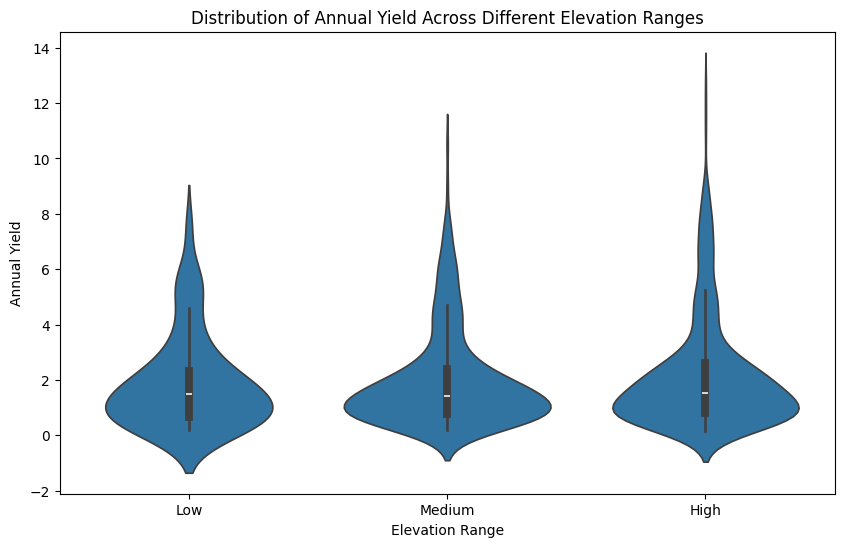

In [15]:
# Categorize 'Elevation' into ranges
data['Elevation_range'] = pd.cut(data['Elevation'], bins=[-float('inf'), 300, 600, float('inf')],
                                  labels=['Low', 'Medium', 'High'])

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Elevation_range', y='Annual_yield', data=data)
plt.title('Distribution of Annual Yield Across Different Elevation Ranges')
plt.xlabel('Elevation Range')
plt.ylabel('Annual Yield')
plt.show()


## Total sum of integer values for unique crop types

In [16]:
# Define a recursive function to sum integer values of unique crop types
def sum_crop_values_recursive(unique_crop_types, data):
    if len(unique_crop_types) == 0:
        return 0
    else:
        current_crop_type = unique_crop_types.pop()
        crop_length = len(current_crop_type)
        sum_so_far = crop_length + sum_crop_values_recursive(unique_crop_types, data)
        return sum_so_far

# Get unique crop types
unique_crop_types = data['Crop_type'].unique()

# Calculate the sum of integer values using recursion
total_sum = sum_crop_values_recursive(list(unique_crop_types), data)

print("Total sum of integer values for unique crop types (using recursion):", total_sum)


Total sum of integer values for unique crop types (using recursion): 42


## p-value

In [18]:
from scipy.stats import ttest_ind
# Filter data for coffee and banana crop types
coffee_data = data[data['Crop_type'] == 'coffee']['Annual_yield']
banana_data = data[data['Crop_type'] == 'banana']['Annual_yield']

# Perform t-test
t_statistic, p_value = ttest_ind(coffee_data, banana_data)

# Print p-value rounded to three decimal places
print("p-value:", round(p_value, 3))


p-value: 0.598


## KEP PERFORMANCE INDICATOR [ KPI]

In [21]:
data.describe()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,2779.486000,628.136035,1197.734700,-4.504100,30.89460,5.603899,2.233740e-01,3.962400,2.101536
std,1595.068372,179.098546,497.794699,1.568117,1.92225,0.802154,2.288665e-01,3.459036,1.926694
min,1.000000,35.910797,110.100000,-9.700000,25.10000,3.701838,5.400000e-10,0.500000,0.174857
25%,1442.250000,504.392825,771.575000,-5.600000,29.57500,5.018775,4.449419e-02,1.500000,0.786612
50%,2728.500000,657.468975,1194.900000,-4.400000,30.90000,5.562078,1.661962e-01,2.900000,1.478622
75%,4133.000000,761.075752,1616.900000,-3.300000,32.20000,6.201437,3.077840e-01,4.700000,2.519811
max,5632.000000,1003.943700,2408.500000,-1.200000,37.30000,7.484683,9.954134e-01,15.000000,12.695224


C:\Users\hicham\AppData\Local\Temp\ipykernel_12380\3408469377.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Crop_type', data=data, palette='viridis')


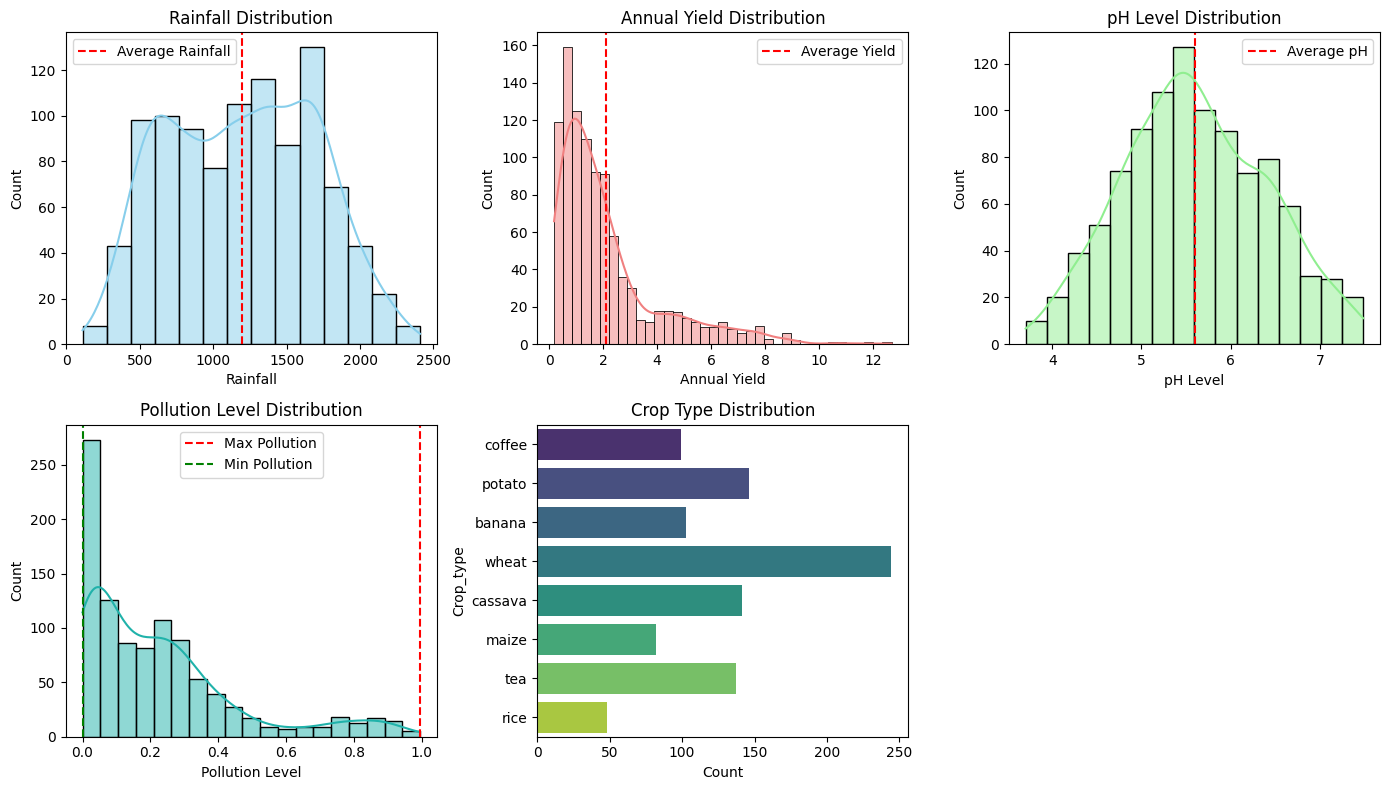

In [22]:
# Calculate KPIs
avg_rainfall, avg_yield, avg_ph, max_pollution, min_pollution, crop_distribution = calculate_kpis(data)

# Plotting
plt.figure(figsize=(14, 8))

# Plot average rainfall
plt.subplot(2, 3, 1)
sns.histplot(data['Rainfall'], kde=True, color='skyblue')
plt.axvline(x=avg_rainfall, color='red', linestyle='--', label='Average Rainfall')
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall')
plt.legend()

# Plot average annual yield
plt.subplot(2, 3, 2)
sns.histplot(data['Annual_yield'], kde=True, color='lightcoral')
plt.axvline(x=avg_yield, color='red', linestyle='--', label='Average Yield')
plt.title('Annual Yield Distribution')
plt.xlabel('Annual Yield')
plt.legend()

# Plot average pH level
plt.subplot(2, 3, 3)
sns.histplot(data['pH'], kde=True, color='lightgreen')
plt.axvline(x=avg_ph, color='red', linestyle='--', label='Average pH')
plt.title('pH Level Distribution')
plt.xlabel('pH Level')
plt.legend()

# Plot pollution level distribution
plt.subplot(2, 3, 4)
sns.histplot(data['Pollution_level'], kde=True, color='lightseagreen')
plt.axvline(x=max_pollution, color='red', linestyle='--', label='Max Pollution')
plt.axvline(x=min_pollution, color='green', linestyle='--', label='Min Pollution')
plt.title('Pollution Level Distribution')
plt.xlabel('Pollution Level')
plt.legend()

# Plot crop type distribution
plt.subplot(2, 3, 5)
sns.countplot(y='Crop_type', data=data, palette='viridis')
plt.title('Crop Type Distribution')
plt.xlabel('Count')

plt.tight_layout()
plt.show()


## CONCLUSION PROJECT : 

The analysis of agricultural data provides valuable insights into various aspects of crop cultivation and environmental factors affecting yield. From the examination of the dataset, several key findings emerged:

1. **Crop Diversity:** The dataset contains a variety of crop types, with wheat being the most common, followed by potato, cassava, and tea. Understanding the distribution of crops can aid in agricultural planning and resource allocation.

2. **Yield Analysis:** The maximum annual yield for wheat crops was found to be 8.99, indicating the potential productivity of this crop type under optimal conditions. Additionally, total rainfall was assessed for crop types where pollution levels exceeded a certain threshold, highlighting the impact of environmental factors on agricultural output.

3. **Temperature Variation:** Analysis of temperature ranges across different fields revealed significant variations, with temperature ranges spanning from 33.4 to 40.7 degrees Celsius. Understanding temperature variations is crucial for selecting appropriate crops and optimizing growing conditions.

4. **Soil pH and Plot Size:** The dataset was analyzed to determine the total plot size for areas with soil pH levels below 5.5, providing insights into the spatial distribution of soil acidity and its implications for crop cultivation.

5. **Statistical Significance:** Statistical tests, such as t-tests, were conducted to assess differences in annual yields between different crop types, providing valuable insights into crop performance and potential areas for improvement.

6. **Performance Metrics:** Key performance indicators (KPIs), including average rainfall, annual yield, pH levels, and pollution levels, were calculated to gauge overall agricultural performance. Visualizations were also employed to illustrate the distribution of these metrics across the dataset.

In conclusion, the comprehensive analysis of agricultural data enables informed decision-making and optimization of farming practices, ultimately contributing to increased productivity and sustainability in agriculture. These insights can inform policymakers, researchers, and farmers alike, facilitating the development of strategies to address challenges and capitalize on opportunities in agricultural production.